In [1]:
"""Program that contains a Genetic Algorithm class and handles two types of problems: word and binary representation finder."""
import random
from random import choice
import numpy as np
import matplotlib.pyplot as plt
import sys
import math
import string


class GeneticAlgorithm:
    """Creates a generic Genetic Algorithm class.

    Attributes:
        fitness: The fitness function of the problem.
        individual_factory: Function that creates an individual.
        termination_condition: Condition to terminate the Genetic Algorithm process in terms of the fitness.
        gene_factory: Function that creates the genes of an individual.
        max_iter: Integer indicating the maximum number of generations to create.
        pop_size: Integer indicating the population size of all the generations.
        mutation_rate: Float representing the probability to apply mutation over an individual.
        silent: Boolean that dictaminates wether to print or not all the extra information about the process.
        negative_maximization: Boolean referring to the type of maximization (if it has negatives values or don't).
        worst_fitness: Integer representing the worst fitness expected of an individual.
        cross_over_points: An integer, either 1 or 2, representing the number of points to use on the cross-over.
        legible_result: Boolean indicating wether to print or not the output in a legible way as a string.
        problem_name: String representing the problem to resolve. It is only used for saving the plots.
    """
    
    def __init__(self, fitness, individual_factory, gene_factory, max_iter, termination_condition, pop_size=100, mutation_rate=0.2, silent=False, negative_maximization=False, cross_over_points=1, visualization_function=None, legible_result=False, problem_name='problem'):
        """Inits GeneticAlgorithm."""
        self.fitness = fitness
        self.individual_factory = individual_factory
        self.termination_condition = termination_condition
        self.gene_factory = gene_factory
        self.max_iter = max_iter
        self.pop_size = pop_size
        self.mutation_rate = mutation_rate
        self.silent = silent
        self.worst_fitness = - sys.maxsize - 1 if negative_maximization else 0
        self.cross_over_points = cross_over_points
        self.visualization_function = visualization_function
        self.legible_result = legible_result
        self.problem_name = problem_name

    def generate_population(self):
        """Generates the first generation population.
        
        Returns:
            A list containing all the individuals of a generation.
        """
        population = []
        for i in range(self.pop_size):
            individual = self.individual_factory()
            population.append(individual)
        return population
    
    def select_individual(self, population):
        """Selects an individual for the crossover.

        It chooses the individual through the Tennis Tournament algorithm, picking 5 random
        individuals, and choosing the one with the highest fitness score.

        Args:
            population: All the population of the current generation.

        Returns:
            The individual selected.
        """
        n = len(population) - 1
        random_individuals = []
        max_individual = 0
        best_fitness = self.worst_fitness
        for i in range(5):
            j = random.randint(0, n)
            p = population[j]
            individual_fitness = self.fitness(p)
            if individual_fitness >= best_fitness:
                max_individual = p
                best_fitness = individual_fitness
        return max_individual
    
    def cross_over(self, parent_1, parent_2):
        """Performs the crossover between the two parents.

        If self.cross_over_points is 1, it uses only one point as a division for the
        cross-over. If 2, it uses 2 points.

        Args:
            parent_1: First parent.
            parent_2: Second parent.
        
        Returns:
            Two child that result from the crossover of the two parents.
        """
        n = len(parent_1) - 1
        child_1 = []
        child_2 = []
        
        if self.cross_over_points > 2 or self.cross_over_points < 1:
            raise ValueError('cross_over_points value must be either 1 or 2.')
        
        elif self.cross_over_points == 1:
            gene = random.randint(2, n-1)
            for i in range(gene):
                child_2.append(parent_1[i])
                child_1.append(parent_2[i])
            for i in range(n - gene + 1):
                child_1.append(parent_1[gene + i])
                child_2.append(parent_2[gene + i])
        
        else:
            gene_1 = random.randint(1, n - 2)
            gene_2 = random.randint(gene_1, n - 1)
            for i in range(gene_1):
                child_2.append(parent_1[i])
                child_1.append(parent_2[i])
            for j in range(gene_1, gene_2):
                child_1.append(parent_1[j])
                child_2.append(parent_2[j])
            for k in range(gene_2, n + 1):
                child_2.append(parent_1[k])
                child_1.append(parent_2[k])
        
        if np.random.rand() <= self.mutation_rate:
            i_1 = random.randint(0, len(child_1) - 1)
            old_gene = child_1[i_1]
            mutated_gene = self.gene_factory()
            while mutated_gene == old_gene: mutated_gene = self.gene_factory()
            child_1[i_1] = mutated_gene
        if np.random.rand() <= self.mutation_rate:
            i_2 = random.randint(0, len(child_2) - 1)
            old_gene = child_2[i_2]
            mutated_gene = self.gene_factory()
            while mutated_gene == old_gene: mutated_gene = self.gene_factory()
            child_2[i_2] = mutated_gene

        return child_1, child_2
           
    def evaluate_fitness(self, population):
        """Evaluates the fitness of all the population individually.

        Args:
            population: All the population of the current generation.

        Returns:
            For the current generation, a list with the fitness of each individual, the average of all the fitness,
            the individual with the best fitness score, the best fitness score, and the worst fitness score.
        """
        best_fitness = self.worst_fitness
        best_individual = None
        fitness_list = []
        for individual in population:
            fitness = self.fitness(individual)
            if fitness >= best_fitness:
                best_fitness = fitness
                best_individual = individual
            fitness_list.append(fitness)
        average_fitness = np.average(np.array(fitness_list))
        worst_fitness = min(fitness_list)
        return fitness_list, average_fitness, best_individual, best_fitness, worst_fitness
    
    def plot_results(self, best_fitness, avg_fitness, worst_fitness):
        """Plots the complete performance of the Genetic Algorithm.
        
        Args:
            best_fitness: List of integers representing the best fitness score of each generation.
            avg_fitness: List of floats representing the average fitness score of each generation.
            worst_fitness: List of integers representing the worst fitness score of each generation.
        """
        f1 = plt.figure(1, figsize=(10,7))
        ax1 = f1.add_subplot(111)
        ax1.set_title("Fitness v/s Generation")    
        ax1.set_xlabel('generation')
        ax1.set_ylabel('fitness')
        ax1.plot(best_fitness, c='steelblue', label='Best')
        ax1.plot(avg_fitness, '--', c='darkorange', label='Avg')
        ax1.plot(worst_fitness, '--', c='r', label='Worst')
        ax1.legend()
        f1.show()
        plt.savefig(self.problem_name, bbox_inches='tight')
        
    def run(self):
        """Runs the Genetic Algorithm.
        
        Returns:
            If found a solution, a string indicating it plus the solution. If not, a string
            saying the solution was not found. 
        """
        population = self.generate_population()
        best_fitness = self.worst_fitness
        iteration = 0
        best_fitness_list = []
        avg_fitness_list = []
        worst_fitness_list = []
        while(iteration <= self.max_iter):
            if not self.silent:
                print("Generation: ", iteration)
            fitness_list, avg_fitness, best_individual, best_fitness, worst_fitness = self.evaluate_fitness(population)
            best_fitness_list.append(best_fitness)
            avg_fitness_list.append(avg_fitness)
            worst_fitness_list.append(worst_fitness)
            if not self.silent:
                print("Best fitness this generation: ", best_fitness)
            if self.termination_condition(best_fitness):
                self.plot_results(best_fitness_list, avg_fitness_list, worst_fitness_list)
                if self.visualization_function != None:
                    self.visualization_function(best_individual, "Solution")
                if self.legible_result:
                    return "Found solution: " + ''.join(l for l in best_individual)
                print("Found solution: ")
                return best_individual
            new_generation = []
            while len(new_generation) < 100:
                child_1, child_2 = self.cross_over(self.select_individual(population), self.select_individual(population))
                new_generation.append(child_1)
                new_generation.append(child_2)
            population = new_generation
            iteration += 1
        self.plot_results(best_fitness_list, avg_fitness_list, worst_fitness_list)
        return "Solution not found"

In [2]:
# 'Finding the word' problem.

WORD_TO_FIND = 'paralelepipedo'
NUMBER_OF_WORD_GENES = len(WORD_TO_FIND)
ALPHABET = string.ascii_lowercase


def fitness_words(an_individual):
    """Fitness function for the 'finding the word' problem.

    Args:
        an_individual: Individual to calculate the fitness for.
    
    Returns:
        An integer with the fitness score.
    """
    result = 0
    for i, j in zip(an_individual, WORD_TO_FIND):
        if i == j:
            result += 1    
    return result


def letter_factory():
    """Function that returns a random letter from the alphabet."""
    return ''.join(choice(string.ascii_lowercase))

   
def sequence_letter_factory():
    """Function that creates a word with random letters from the alphabet.

    Returns:
        A list containing the letters of the word generated.
    """
    return [letter_factory() for i in range(NUMBER_OF_WORD_GENES)]


ga_words = GeneticAlgorithm(fitness_words, sequence_letter_factory, 
                 letter_factory, max_iter=200, termination_condition = lambda f : f == NUMBER_OF_WORD_GENES, legible_result=True, problem_name='word_problem')


In [3]:
# 'Finding a binary representation of a decimal number' problem.

NUMBER_TO_CONVERT = 157492

def lenght_in_bits(number):
    """Function that calculates the lenght in bits of a decimal number.

    Returns:
        An integer indicating the number of bits of a decimal number.
    """
    return math.floor(math.log2(number)) + 1


def fitness_bits(an_individual):
    """Fitness function for the 'finding a binary representation of a decimal number' 
    problem.

    Args:
        an_individual: Individual to calculate the fitness for.
    
    Returns:
        An integer with the fitness score.
    """
    result = 0
    exp = 1
    for v in an_individual[::-1]:
        result += int(v) * exp
        exp *= 2
    return - abs(NUMBER_TO_CONVERT - result)


def bit_factory():
    """Function that returns a random bit.
    
    Returns:
        A string containing a bit number representation.
    """
    if (np.random.rand() > 0.5):
        return '1'
    else:
        return '0'


def sequence_bit_factory():
    """Creates a list containing the representation of bits generating a binary number.

    Returns:
        A list with the strings containing the representation of each bit of a binary number.
    """
    return [ bit_factory() for i in range(NUMBER_OF_BIT_GENES) ]


NUMBER_OF_BIT_GENES = lenght_in_bits(NUMBER_TO_CONVERT)

ga_bits = GeneticAlgorithm(fitness_bits, sequence_bit_factory, 
                 bit_factory, max_iter=200, mutation_rate=0.4,termination_condition = lambda f : f == 0, negative_maximization=True, legible_result=True, problem_name='bit_problem')

In [4]:
# N-Queen problem

NUMBER_OF_QUEENS = 8
NUMBER_OF_GENES = NUMBER_OF_QUEENS

def fitness_nqueen(an_individual):
    """Fitness function for the 'N-Queen' 
    problem.

    Args:
        an_individual: Individual to calculate the fitness for.
    
    Returns:
        An integer with the fitness score.
    """
    n_hits = 0
    row_and_col_hits = abs(len(an_individual) - len(np.unique(an_individual)))
    n_hits += row_and_col_hits
    for i in range(len(an_individual)):
        for j in range(len(an_individual)):
            if (i != j):
                dx = abs(i - j)
                dy = abs(an_individual[i] - an_individual[j])
                if dx == dy:
                    n_hits += 1
    return -n_hits
    

def queen_factory():
    """Function that returns a random integer."""
    return random.randint(0, NUMBER_OF_GENES - 1)
    

def sequence_queen_factory():
    """Creates a list containing integers representing the row position of each column position represented by
    the list index.

    Returns:
        A list with with integers.
    """
    return [ queen_factory() for i in range(NUMBER_OF_GENES) ]


def plot_board(individual, title=None):
    """Function that plots the chess board with Queens.

    Args:
        individual: A list containing integers representing the row position of each column position represented by the list index.
        title: String representing the title of the plot.
    """
    board = np.zeros((NUMBER_OF_QUEENS,NUMBER_OF_QUEENS,3))
    board += 0.5 # "Black" color
    board[::2, ::2] = 1 # "White" color
    board[1::2, 1::2] = 1 # "White" color

    positions = individual
    n = len(individual)

    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(board, interpolation='nearest')
    ax.set_title(title)

    queen = plt.imread('queen.png')
    extent = np.array([-0.4, 0.4, -0.4, 0.4])
    for x, y in enumerate(positions):
        ax.imshow(queen, extent=extent + [x, x, y, y])

    ax.set(xticks=[], yticks=[])
    ax.axis('image')
    plt.savefig('queens_on_board.png', bbox_inches='tight')
    plt.show()


ga_nqueen = GeneticAlgorithm(fitness_nqueen, sequence_queen_factory, 
                 queen_factory, max_iter=500, termination_condition = lambda f : f == 0, cross_over_points=2, visualization_function=plot_board, negative_maximization=True, problem_name='queen_problem')

Generation:  0
Best fitness this generation:  3
Generation:  1
Best fitness this generation:  4
Generation:  2
Best fitness this generation:  6
Generation:  3
Best fitness this generation:  6
Generation:  4
Best fitness this generation:  7
Generation:  5
Best fitness this generation:  8
Generation:  6
Best fitness this generation:  9
Generation:  7
Best fitness this generation:  10
Generation:  8
Best fitness this generation:  11
Generation:  9
Best fitness this generation:  11
Generation:  10
Best fitness this generation:  11
Generation:  11
Best fitness this generation:  11
Generation:  12
Best fitness this generation:  11
Generation:  13
Best fitness this generation:  11
Generation:  14
Best fitness this generation:  11
Generation:  15
Best fitness this generation:  11
Generation:  16
Best fitness this generation:  11
Generation:  17
Best fitness this generation:  11
Generation:  18
Best fitness this generation:  11
Generation:  19
Best fitness this generation:  11
Generation:  20
B

'Found solution: paralelepipedo'

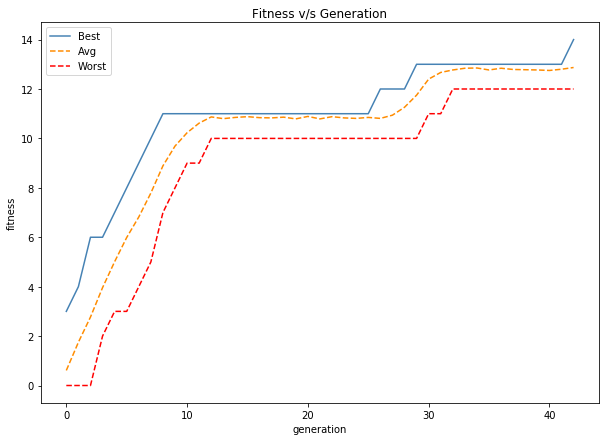

In [5]:
ga_words.run()

Generation:  0
Best fitness this generation:  -116
Generation:  1
Best fitness this generation:  -116
Generation:  2
Best fitness this generation:  -30
Generation:  3
Best fitness this generation:  -14
Generation:  4
Best fitness this generation:  -1
Generation:  5
Best fitness this generation:  -1
Generation:  6
Best fitness this generation:  -1
Generation:  7
Best fitness this generation:  -1
Generation:  8
Best fitness this generation:  -1
Generation:  9
Best fitness this generation:  -1
Generation:  10
Best fitness this generation:  0


'Found solution: 100110011100110100'

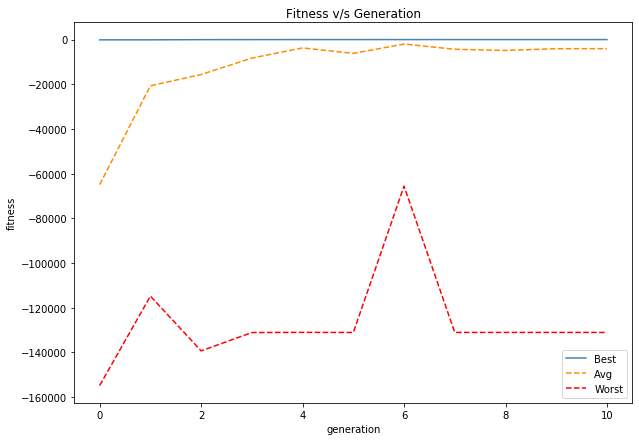

In [6]:
ga_bits.run()

Generation:  0
Best fitness this generation:  -5
Generation:  1
Best fitness this generation:  -4
Generation:  2
Best fitness this generation:  -3
Generation:  3
Best fitness this generation:  -2
Generation:  4
Best fitness this generation:  -2
Generation:  5
Best fitness this generation:  -2
Generation:  6
Best fitness this generation:  -2
Generation:  7
Best fitness this generation:  -2
Generation:  8
Best fitness this generation:  -2
Generation:  9
Best fitness this generation:  -2
Generation:  10
Best fitness this generation:  -2
Generation:  11
Best fitness this generation:  -2
Generation:  12
Best fitness this generation:  -2
Generation:  13
Best fitness this generation:  -2
Generation:  14
Best fitness this generation:  -2
Generation:  15
Best fitness this generation:  -2
Generation:  16
Best fitness this generation:  -2
Generation:  17
Best fitness this generation:  -2
Generation:  18
Best fitness this generation:  -2
Generation:  19
Best fitness this generation:  -2
Generation

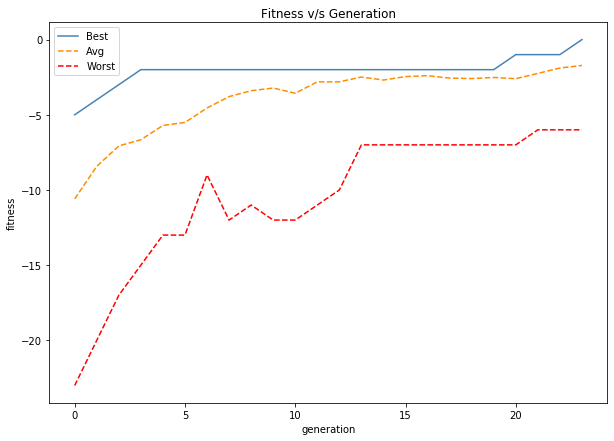

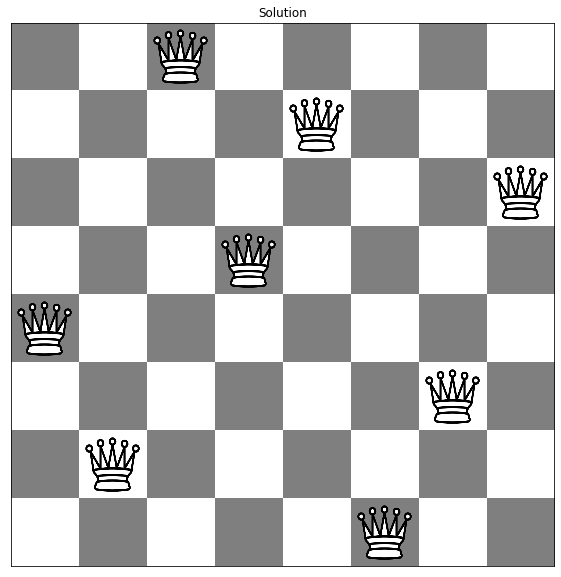

Found solution: 


[3, 1, 7, 4, 6, 0, 2, 5]

In [7]:
ga_nqueen.run()